In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('fetal_health.csv')

In [51]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### Logistic Regression

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop('fetal_health', axis=1), 
                                                    df['fetal_health'], shuffle=False, test_size=0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(max_iter=1000)
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Need to scale data because logistic regression model did not converge

In [54]:
from sklearn.metrics import classification_report

y_pred = logReg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.73      0.83       436
         2.0       0.06      0.78      0.12         9
         3.0       0.69      0.77      0.73        87

    accuracy                           0.73       532
   macro avg       0.57      0.76      0.56       532
weighted avg       0.91      0.73      0.80       532



In [55]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(max_depth=5)
dTree.fit(X_train,y_train)

y_pred = dTree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.62      0.75       436
         2.0       0.02      0.56      0.04         9
         3.0       0.27      0.07      0.11        87

    accuracy                           0.53       532
   macro avg       0.41      0.42      0.30       532
weighted avg       0.82      0.53      0.63       532



### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rfModel = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1, max_depth=5)
rfModel.fit(X_train, y_train)

y_pred = rfModel.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.91      0.81      0.86       436
         2.0       0.04      0.56      0.07         9
         3.0       0.78      0.16      0.27        87

    accuracy                           0.70       532
   macro avg       0.58      0.51      0.40       532
weighted avg       0.87      0.70      0.75       532



### Feature Selection

Text(0, 0.5, 'Count')

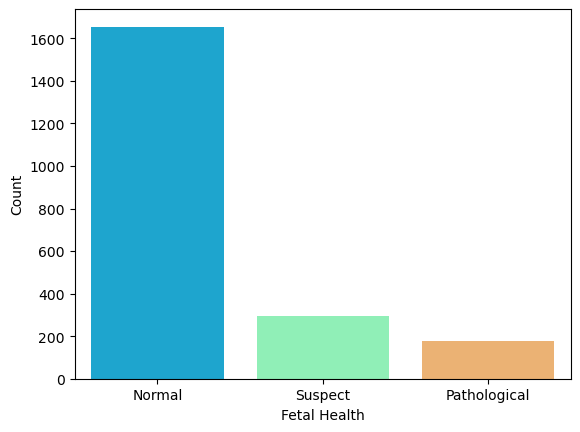

In [57]:
sns.countplot(x='fetal_health',data=df,palette='rainbow')
plt.xticks([0, 1, 2], ['Normal', 'Suspect', 'Pathological'])
plt.xlabel('Fetal Health')
plt.ylabel('Count')

Use weighted F1 as metric since it is less sensitive to class imbalance. 

Text(0.5, 1.0, 'Correlation of Numerical Features with fetal_health')

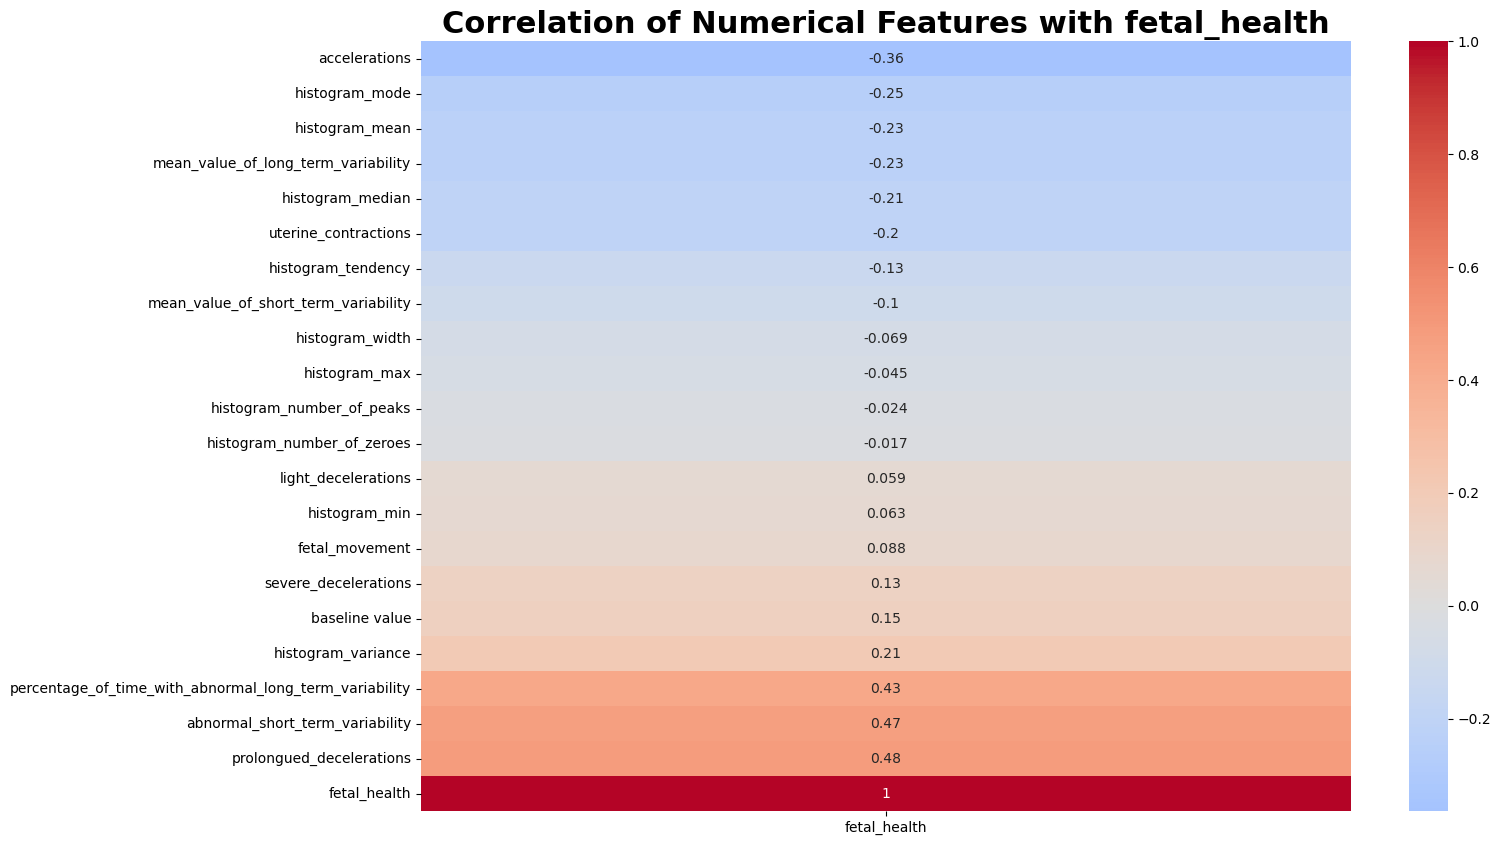

In [155]:
# code from Kaggle
corr_matrix = df.corr()['fetal_health']

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.sort_values().to_frame(), annot=True, cmap='coolwarm', center=0)

plt.title("Correlation of Numerical Features with fetal_health", fontsize=22, fontweight="bold")

**percentage_of_time_with_abnormal_long_term_variability, abnormal_short_term_variability, prolongued_decelerations** positive correlation. **accelerations, histogram_mode, histogram_mean** negative correlation. 
- Set correlation threshold and use a new set of features

In [161]:
corr_threshold = 0.22
corr_matrix = corr_matrix.abs()
corr_matrix = corr_matrix[(corr_matrix.index != 'fetal_health') & (corr_matrix >= corr_threshold)]

vars_to_keep = list(corr_matrix.index.values) 
vars_to_keep.append('fetal_health') 
df2 = df[vars_to_keep]

In [162]:
corr_matrix

accelerations                                             0.364066
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
mean_value_of_long_term_variability                       0.226797
histogram_mode                                            0.250412
histogram_mean                                            0.226985
Name: fetal_health, dtype: float64

In [163]:
df2.head()

,accelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_mode,histogram_mean,fetal_health
0,0.000,0.0,73.0,43.0,2.4,120.0,137.0,2.0
1,0.006,0.0,17.0,0.0,10.4,141.0,136.0,1.0
2,0.003,0.0,16.0,0.0,13.4,141.0,135.0,1.0
3,0.003,0.0,16.0,0.0,23.0,137.0,134.0,1.0
4,0.007,0.0,16.0,0.0,19.9,137.0,136.0,1.0


In [164]:
df2.shape

(2126, 8)

### Try models again

In [165]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('fetal_health', axis=1), 
                                                    df2['fetal_health'], shuffle=False, test_size=0.25)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [167]:
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.78      0.85       436
         2.0       0.06      0.56      0.11         9
         3.0       0.73      0.80      0.77        87

    accuracy                           0.78       532
   macro avg       0.58      0.71      0.58       532
weighted avg       0.90      0.78      0.83       532



Increased from baseline accuracy 0.73 -> 0.78 and weighted F1 0.8 -> 0.83

In [168]:
rfModel = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1, max_depth=5)
rfModel.fit(X_train, y_train)

y_pred = rfModel.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.65      0.78       436
         2.0       0.03      0.56      0.06         9
         3.0       0.89      0.78      0.83        87

    accuracy                           0.67       532
   macro avg       0.63      0.66      0.56       532
weighted avg       0.94      0.67      0.78       532



Random Forest performed worst, probabaly from dropping columns.

## Logistic Regression with Hyperparameter
https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

In [181]:
param_grid = param_grid = [    
    {'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
    }
]

In [183]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(logReg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [185]:
best_clf.best_estimator_

LogisticRegression(C=4.281332398719396, max_iter=1000, solver='liblinear')

In [186]:
logReg = LogisticRegression(C=4.281332398719396, max_iter=1000, solver='liblinear')

logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.79      0.86       436
         2.0       0.06      0.56      0.11         9
         3.0       0.76      0.78      0.77        87

    accuracy                           0.78       532
   macro avg       0.59      0.71      0.58       532
weighted avg       0.90      0.78      0.83       532

